<a href="https://colab.research.google.com/github/veritaem/AB-Demo/blob/master/Copy_of_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [3]:


df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
sns.pairplot(df)

In [4]:
# y variable is price

# I *think* square footage might be the biggest factor in price, since only squares live in houses



y = df['price']
X = df["sqft_living"].as_matrix().reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=1337)

print(X.shape, "\n")
print(y.shape, "\n")
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train = pd.DataFrame(X_train)
X_train.head()

(21613, 1) 

(21613,) 

(10806, 1)
(10807, 1)
(10806,)
(10807,)


,0
0,2330
1,2090
2,1910
3,1060
4,3580


In [5]:
model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [275.35032288]

 Intercept:  -34804.1247175585


In [6]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 70822036221.86314
RMSE is 266124.09928802605
R^2 is 0.49809066389137546


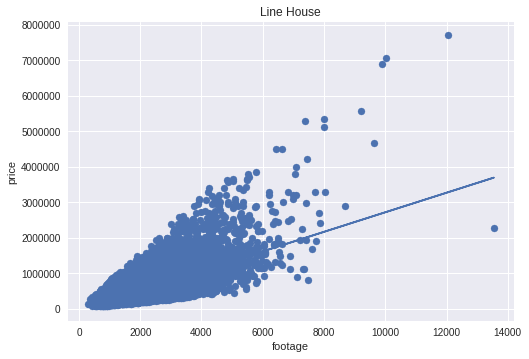

In [7]:
m_hat = model.coef_[0]
b_hat = model.intercept_

plt.scatter(df.sqft_living, df.price)

y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)

plt.ylabel("price")
plt.xlabel("footage")
plt.title("Line House")
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
#y is still price

# one x is still sqrt_living, but i think another might be grade

X2 = df[['sqft_living', 'grade']]
y2 = df['price']


X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=.5, random_state=43)

print(X2.shape)
print(y2.shape)
print(X_train2)
print(X_test2)
print(Y_train2)
print(Y_test2)
X2.head()

In [9]:
model2 = LinearRegression()
model2.fit(X_train2, Y_train2)
print("Coefficient: \n", model2.coef_)
print("\n Intercept: ", model2.intercept_)

Coefficient: 
 [   181.65743756 101185.31060275]

 Intercept:  -614176.8795540376


In [10]:
y_test_predict2 = model2.predict(X_test2)

MSE2 = mean_squared_error(Y_test2, y_test_predict2)

RMSE2 = (np.sqrt(mean_squared_error(Y_test2, y_test_predict2)))

print('MSE is {}'.format(MSE2))
print('RMSE is {}'.format(RMSE2))

R2D2 = r2_score(Y_test2, y_test_predict2)

print('R^2 is {}'.format(R2D2))

MSE is 65304646257.85667
RMSE is 255547.73772791782
R^2 is 0.5204648634095765


Text(0.5,0.92,'Regression Plane')

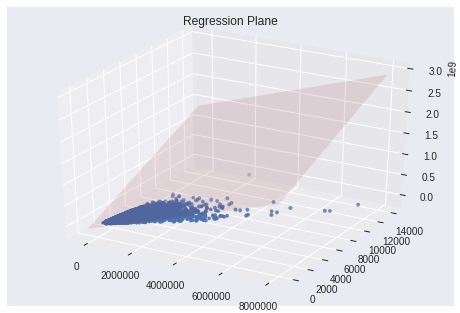

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

modela = model2.coef_[0]
modeli = model2.coef_[1]
modelo = model2.intercept_
plt.scatter( df['price'], df['sqft_living'], df['grade'])

x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = modela*xx + modeli*yy + modelo
plt3d = plt.gca(projection='3d')

plt3d.plot_surface(xx, yy, zz,alpha=0.1, color = 'r')
plt.title("Regression Plane")




# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
dff = df.drop(['id', 'date', 'lat', 'long', 'price'], axis = 1)

In [18]:
X3 = dff
Y3 = df['price']
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=.5, random_state=69)
model3 = LinearRegression()
model3.fit(X_train3, Y_train3)
print("Coefficient: \n", model3.coef_)
print("\n Intercept: ", model3.intercept_)


Coefficient: 
 [-3.47774167e+04  4.49718967e+04  1.02825376e+02 -5.55395878e-03
  3.51457246e+04  5.98842599e+05  3.82254601e+04  1.87785325e+04
  1.19694680e+05  4.33912852e+01  5.94340904e+01 -3.59285123e+03
  1.19069164e+01 -4.35615347e+01  3.62885079e+01 -5.86225193e-01]

 Intercept:  10496107.939354096


In [19]:
y_test_predict3 = model3.predict(X_test3)

MSE3 = mean_squared_error(Y_test3, y_test_predict3)

RMSE3 = (np.sqrt(mean_squared_error(Y_test3, y_test_predict3)))

print('MSE is {}'.format(MSE3))
print('RMSE is {}'.format(RMSE3))

R2pt3 = r2_score(Y_test3, y_test_predict3)

print('R^2 is {}'.format(R2pt3))

MSE is 48660756332.3746
RMSE is 220591.83197111948
R^2 is 0.6546771725968412


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
